In [17]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import csv 
import os 
import seaborn as sns 
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


In [18]:
data = pd.read_csv(r"E:\NYC_airbnb\AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [20]:
data.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
data.duplicated().sum() 
data.drop_duplicates(inplace=True)

In [22]:
data.fillna({'reviews_per_month':0}, inplace=True)
data.fillna({'name':"No Name"}, inplace=True)
data.fillna({'host_name':"No Host Name"}, inplace=True)
data.fillna({'last_review':"No Review"}, inplace=True)

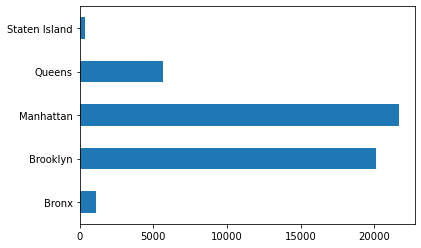

In [23]:
# Which neighborhood_group has the most AirBnB?
data['neighbourhood_group'].value_counts().sort_index().plot.barh()

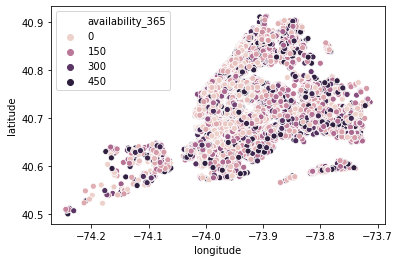

In [24]:
sns.scatterplot(data.longitude,data.latitude,hue=data.availability_365) 
plt.ioff()

In [25]:
labelencoder = LabelEncoder()
data['neighbourhood_group'] = labelencoder.fit_transform(data['neighbourhood_group'])
data['neighbourhood'] = labelencoder.fit_transform(data['neighbourhood'])
data['room_type'] = labelencoder.fit_transform(data['room_type'])

In [26]:
x = data.iloc[:,[0,7]]
y = data['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state=353)

In [27]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = linreg.predict(x_test) 
print('Accuracy on test set: {}'.format(linreg.score(x_test, y_test)))

Accuracy on test set: 0.029942713347720584


In [29]:
predictions = linreg.predict(x_test)
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
error['prediction']=np.array(predictions)
error.head(10)

,actual,prediction
0,99,141.954725
1,75,149.245496
2,260,160.768724
3,200,170.412276
4,135,167.247560
5,35,190.383233
6,225,210.094988
7,35,130.881175
8,280,208.468908
9,125,163.975912
